In [1]:
from footium_api import GqlConnection, CachedGqlConnection
from footium_api.queries import get_players
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from my_info import MyInfo

gql_uncached = GqlConnection()
gql = CachedGqlConnection(gql_uncached, ttl=60*60*24)
plt.rcParams['figure.dpi'] = 254
my_info = MyInfo()

In [2]:
clubIds = my_info.get_club_ids()
filter = {
    "clubId": {"in": clubIds},
}


players = get_players(gql, filter)

In [3]:
print(len(players))
players.head()


45


,fullName,creationRating,potential,rarity,clubId,ownerId,originClubId,generationId,isAcademy,isReserve,...,LWB,RWB,CM,LM,RM,DM,AM,LW,RW,CF
id,,,,,,,,,,,,,,,,,,,,,
0-1033-22,Gustavo Romero,28,15,Common,2879,1405,1033,22,False,False,...,21.93752,22.61600,28.666,23.92214,24.66200,28.314,27.390,22.53504,23.23200,28.105
0-1278-7,Giovanni Proietti,29,19,Common,2879,1405,1278,7,False,False,...,21.73479,22.40700,16.071,22.17226,22.85800,10.670,21.208,28.78766,29.67800,19.745
0-1291-10,Pablo Pea,29,21,Common,2879,1405,1291,10,False,False,...,22.94600,22.25762,15.543,22.57200,21.89484,10.758,20.427,29.23800,28.36086,17.413
0-1332-10,Miguel Burgos,29,21,Common,2879,1405,1332,10,False,False,...,22.70576,23.40800,16.852,22.90849,23.61700,11.682,21.835,28.14746,29.01800,18.689
0-1831-1,Jisoo Gang,25,21,Common,2879,1405,1831,1,False,False,...,16.39979,16.90700,20.691,18.41642,18.98600,19.998,20.086,18.74719,19.32700,25.762


In [4]:
# players.columns.values
outfield_positions = ["CF", "LW", "RW", "AM", "LM", "CM", "RM", "DM", "LWB", "RWB", "LB", "CB", "RB"]
all_positions = outfield_positions + ["GK"]
print(len(players))
players['topRating'] = players[all_positions].max(axis=1)
players['topPosition'] = players[all_positions].idxmax(axis=1)
academy_players = players[players['isAcademy'] == True]
reserve_players = players[players['isReserve'] == True]
players = players[players['isAcademy'] == False]
players = players[players['isReserve'] == False]
print(len(players), len(academy_players), len(reserve_players))



45
23 5 17


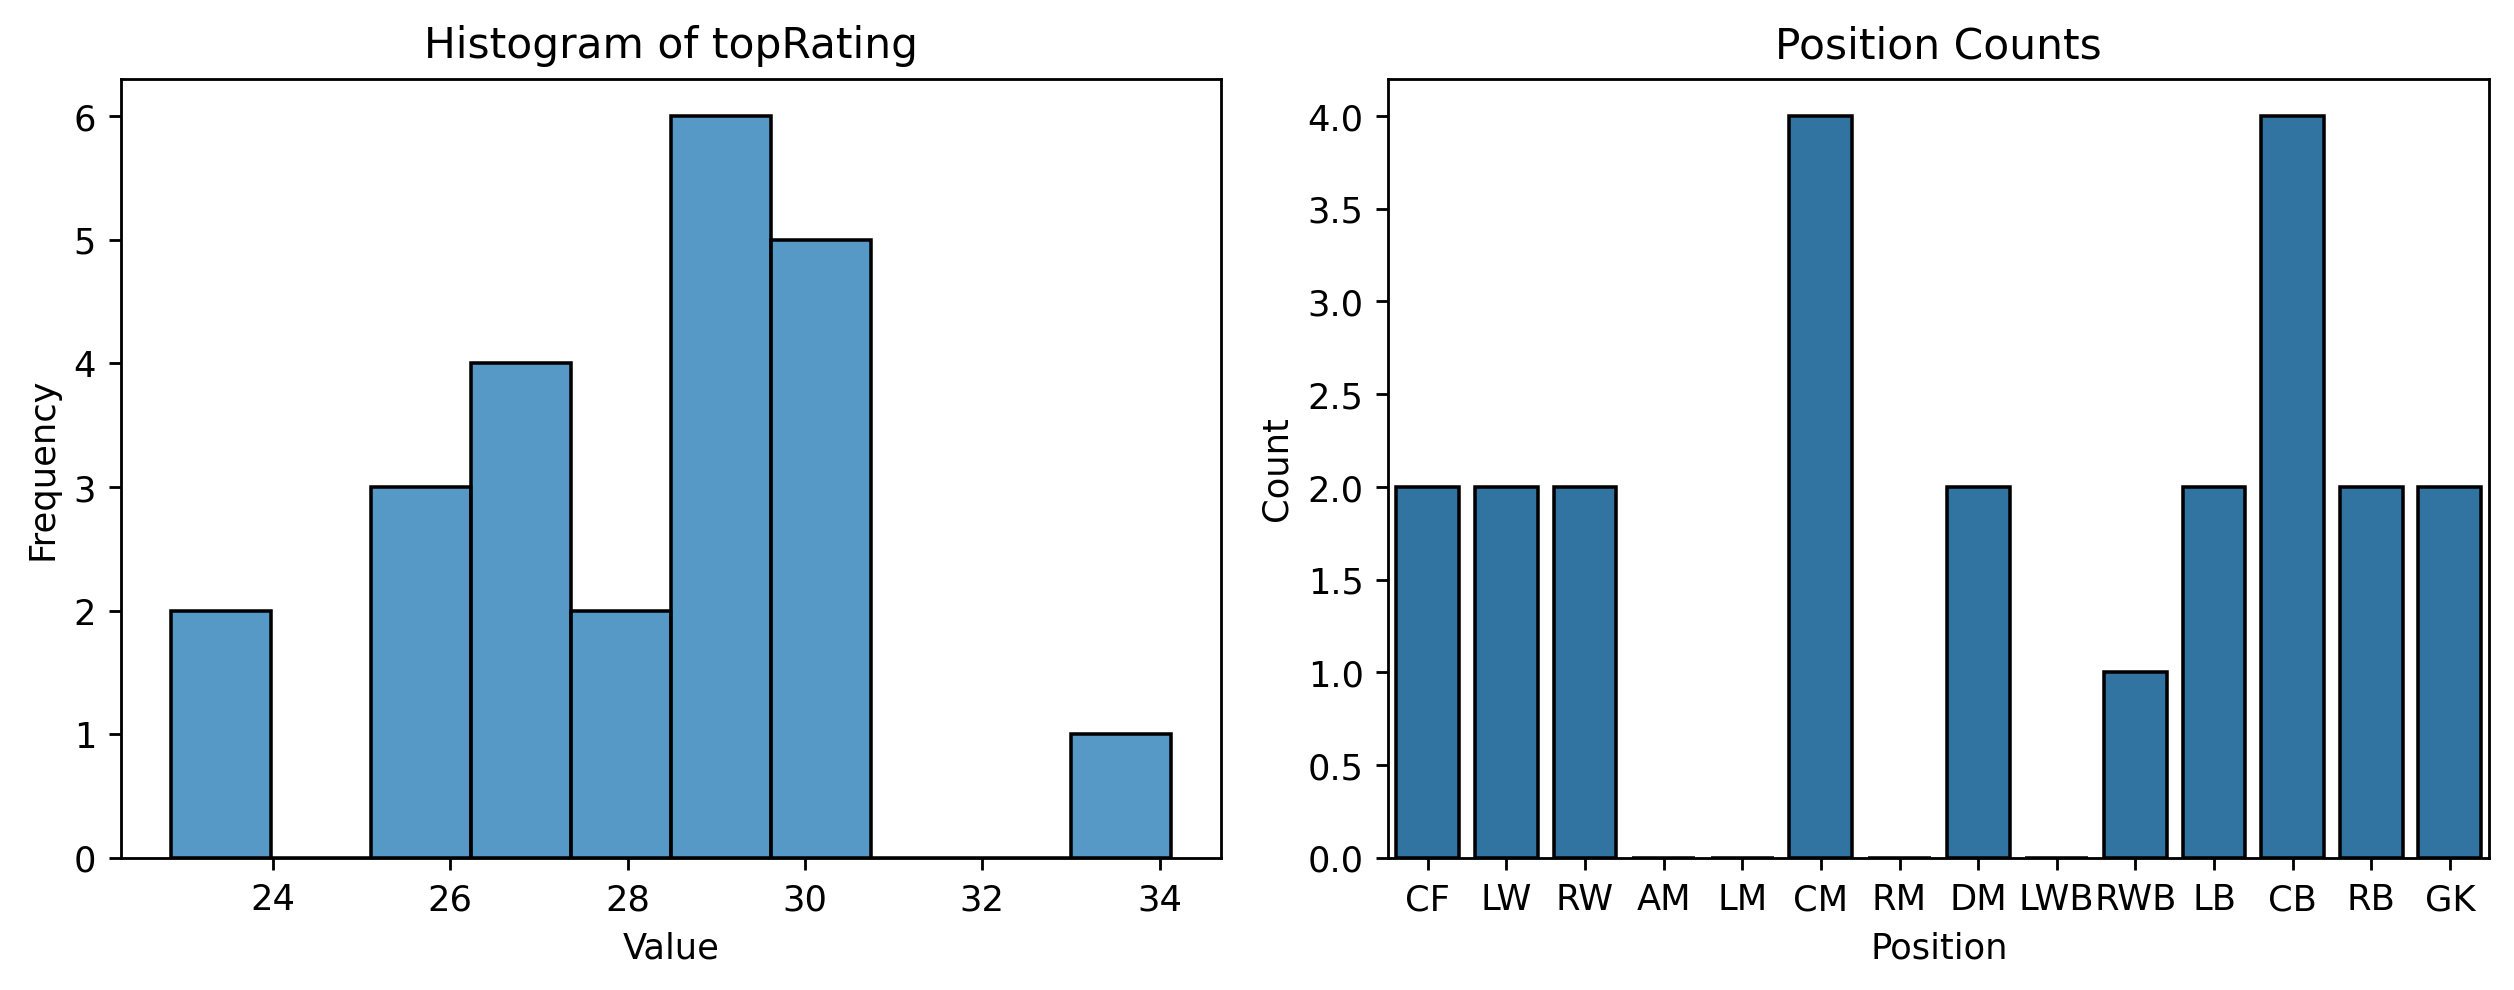

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Histogram of topRating
sns.histplot(players['topRating'], bins=10, kde=False, edgecolor='black', ax=axs[0])
axs[0].set_title('Histogram of topRating')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2: Position Counts
position_counts = {position: (players['topPosition'] == position).sum() for position in all_positions}
position_counts_series = pd.Series(position_counts)
sns.barplot(x=position_counts_series.index, y=position_counts_series.values, edgecolor='black', ax=axs[1])
axs[1].set_title('Position Counts')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

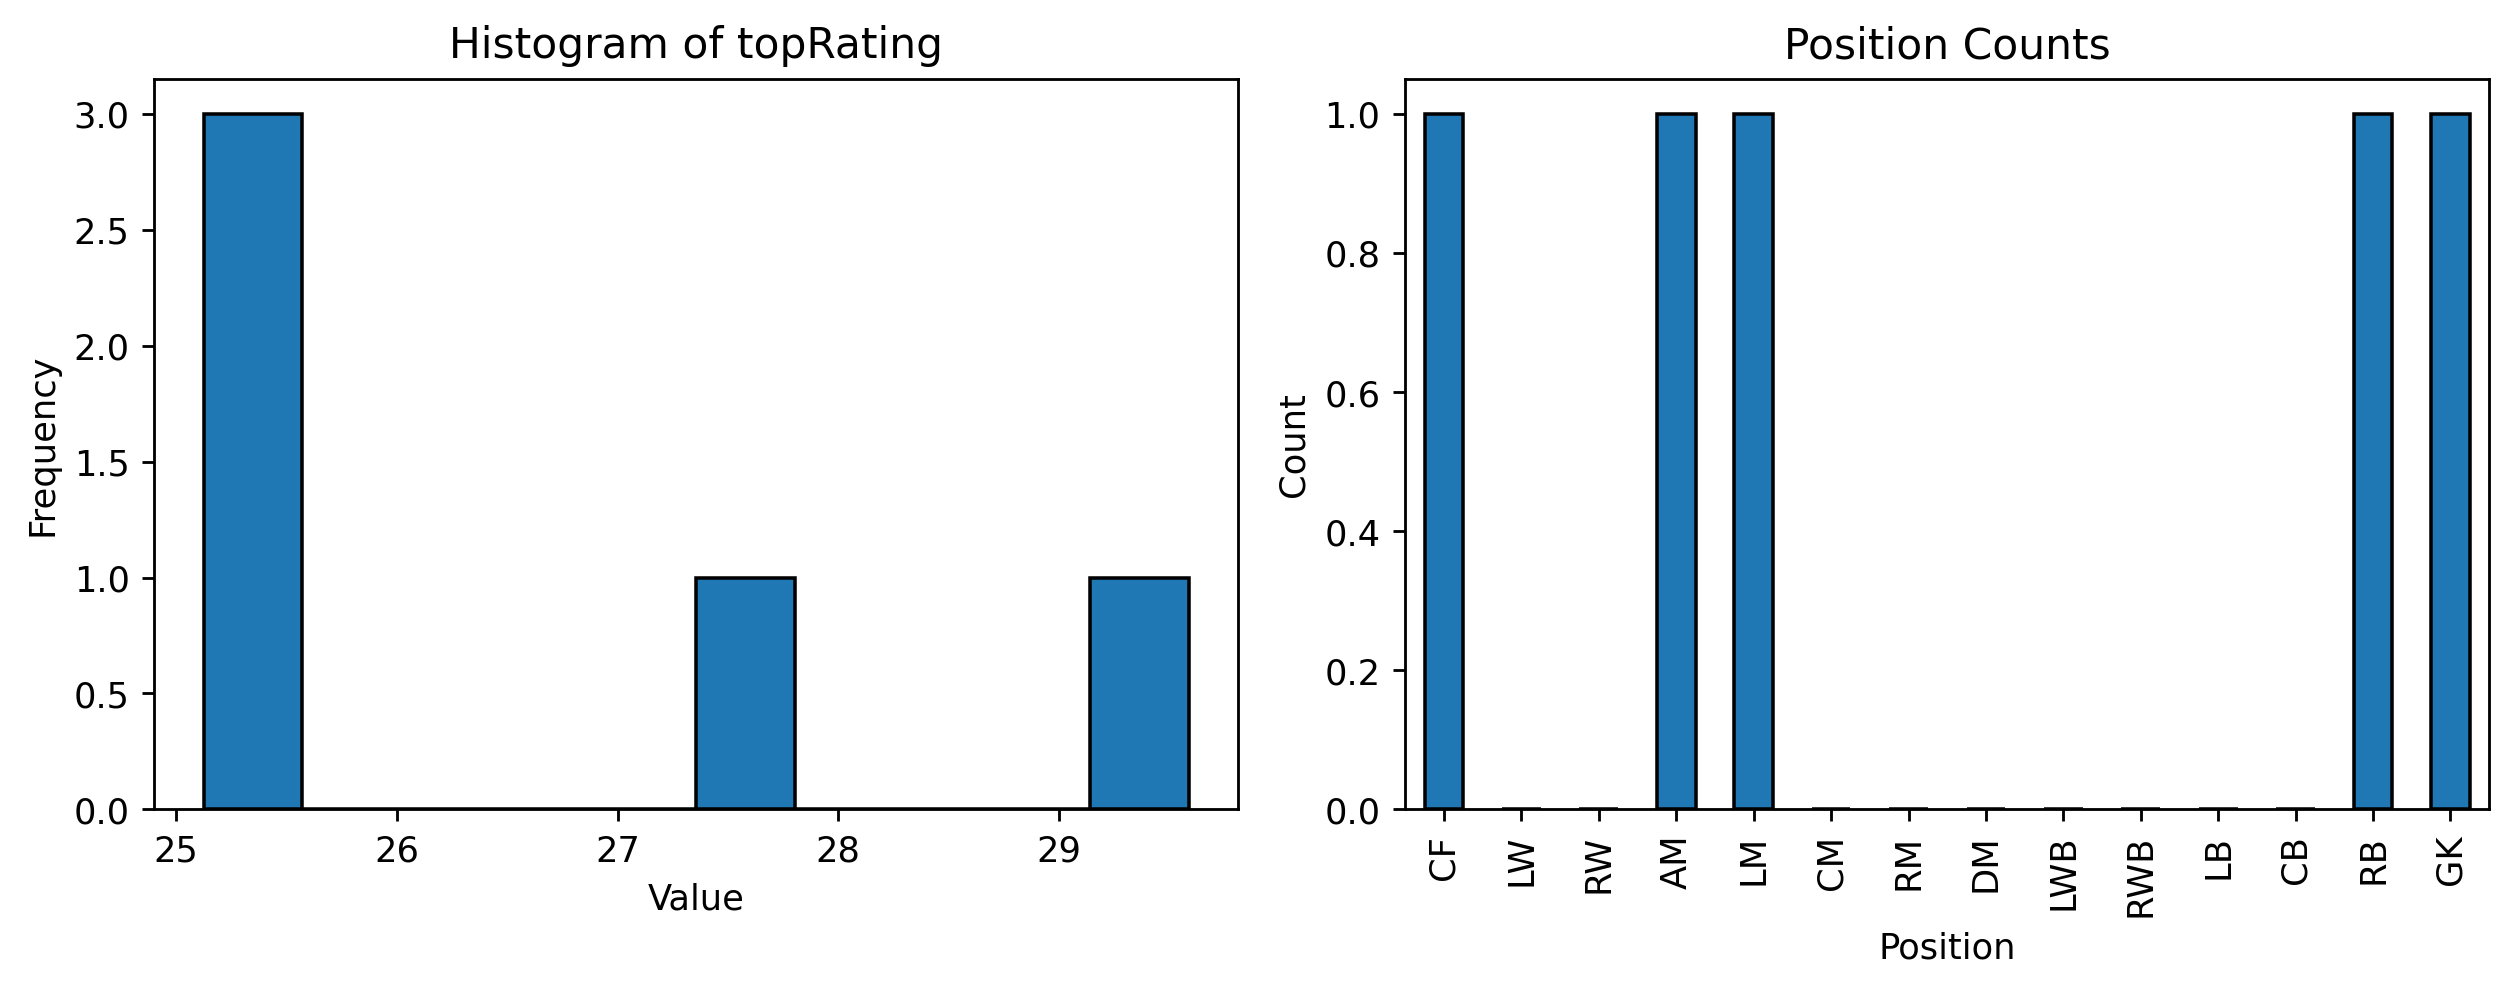

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1
axs[0].hist(academy_players['topRating'], bins=10, edgecolor='black')
axs[0].set_title('Histogram of topRating')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot 2
position_counts = {position: (academy_players['topPosition'] == position).sum() for position in all_positions}
position_counts_series = pd.Series(position_counts)
position_counts_series.plot.bar(edgecolor='black', ax=axs[1])
axs[1].set_title('Position Counts')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

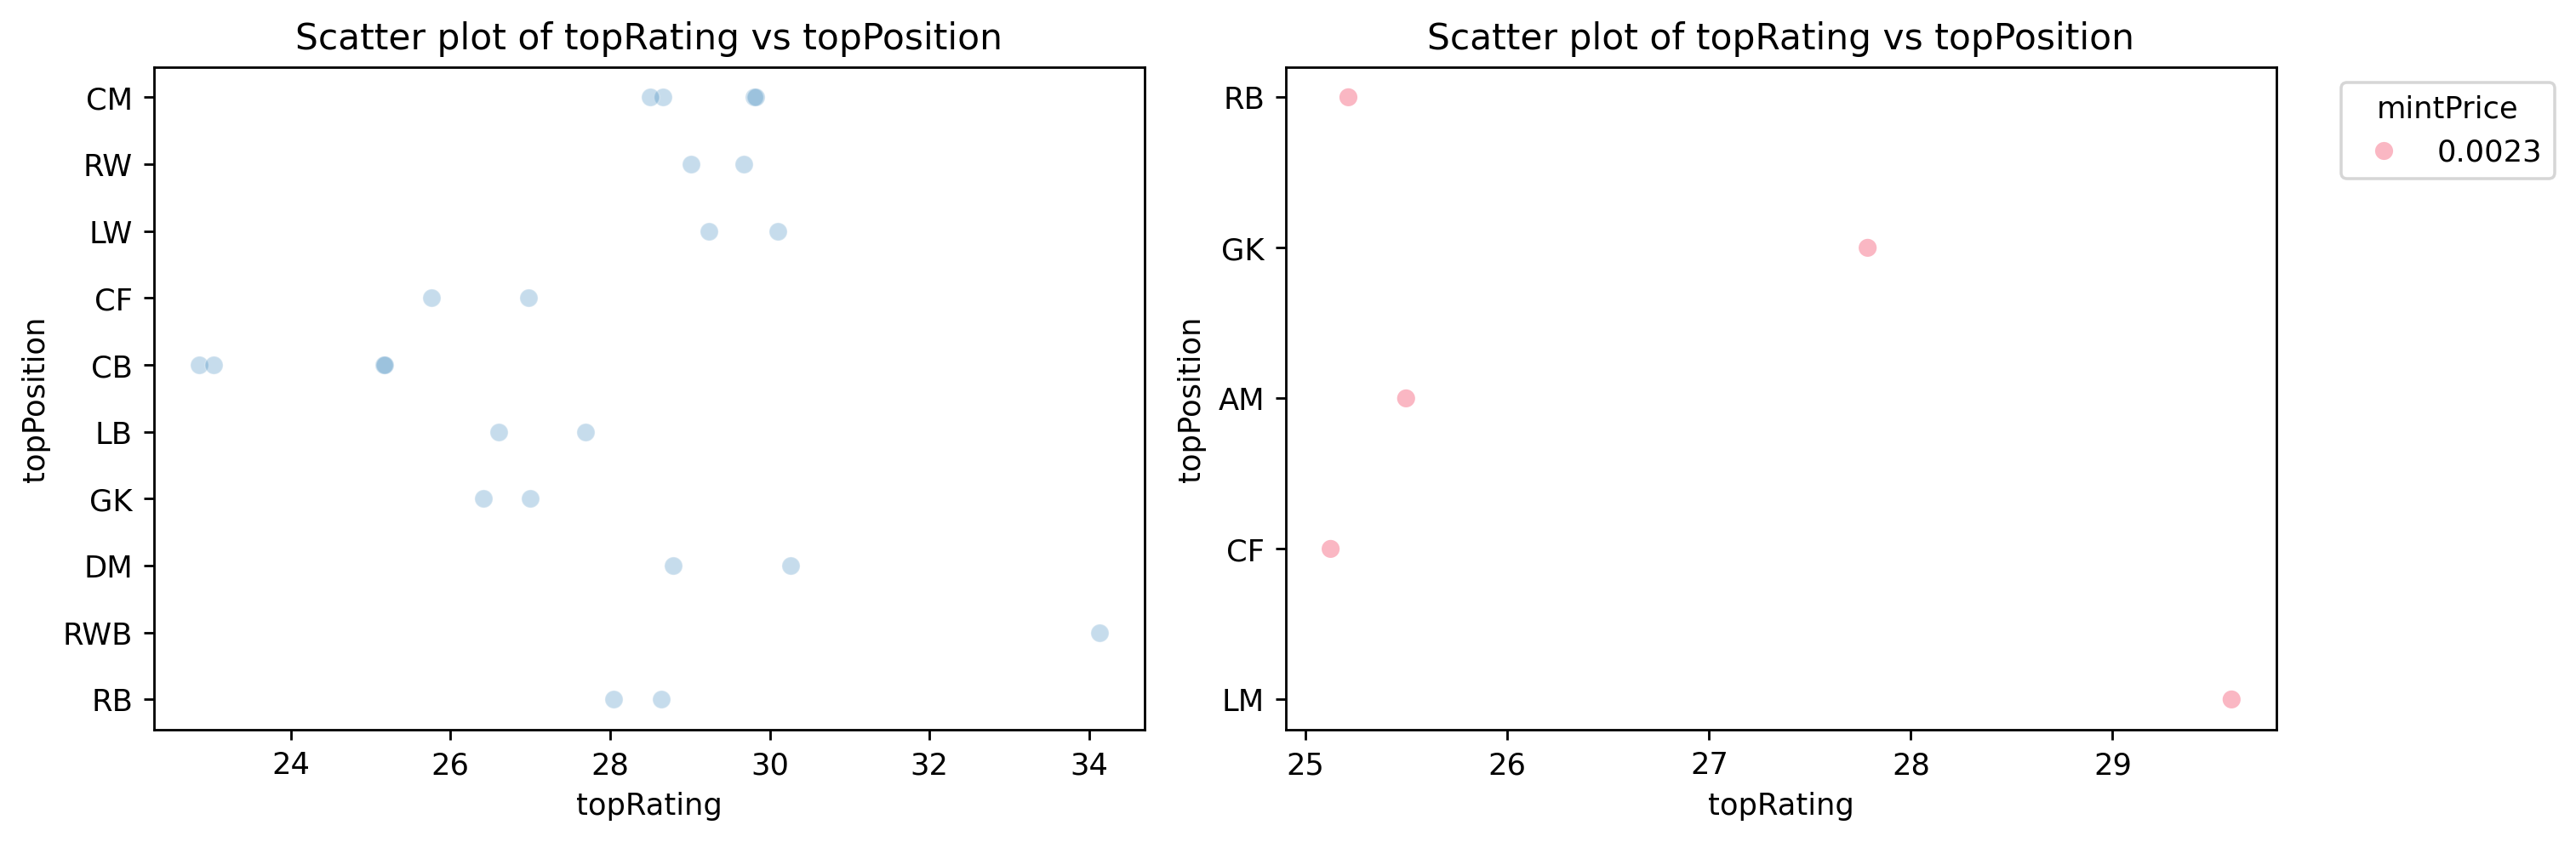

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for `players`
sns.scatterplot(x='topRating', y='topPosition', data=players, ax=axs[0], alpha=0.25)
axs[0].set_title('Scatter plot of topRating vs topPosition')
axs[0].set_xlabel('topRating')
axs[0].set_ylabel('topPosition')

# Scatter plot for `academy_players` with different colors for each 'mintPrice'
sns.scatterplot(x='topRating', y='topPosition', hue='mintPrice', palette='husl', edgecolor='none', data=academy_players, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter plot of topRating vs topPosition')
axs[1].set_xlabel('topRating')
axs[1].set_ylabel('topPosition')
axs[1].legend(title='mintPrice', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend to the right

plt.tight_layout()  # Adjust the layout
plt.show()